In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Input, Dense, Embedding, Conv1D,
                                     GlobalMaxPooling1D, Concatenate, Dropout)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [43]:
df = pd.read_csv('/Users/emeronmarcelle/Library/CloudStorage/OneDrive-Personal/Jupyter Notebook/AJ/Data_Preprocessing/filtered_IG_data8.csv', index_col= 0)
df.reset_index(inplace = True)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7580 entries, 0 to 7579
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             7580 non-null   int64  
 1   caption           7580 non-null   object 
 2   commentsCount     7580 non-null   int64  
 3   dimensionsHeight  7580 non-null   int64  
 4   dimensionsWidth   7580 non-null   int64  
 5   hashtags/0        7580 non-null   object 
 6   hashtags/1        7580 non-null   object 
 7   hashtags/2        7580 non-null   object 
 8   likesCount        7580 non-null   float64
 9   productType       7580 non-null   object 
 10  timestamp         7580 non-null   object 
 11  type              7580 non-null   object 
 12  day_of_week       7580 non-null   object 
 13  popularity_index  7580 non-null   float64
 14  season            7580 non-null   object 
 15  hour_of_day       7580 non-null   int64  
 16  month_of_year     7580 non-null   int64  


<BarContainer object of 71 artists>

/opt/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 44620 (\N{HANGUL SYLLABLE GGA}) missing from current font.
  func(*args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 49472 (\N{HANGUL SYLLABLE SEL}) missing from current font.
  func(*args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from current font.
  func(*args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 54408 (\N{HANGUL SYLLABLE PUM}) missing from current font.
  func(*args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 44277 (\N{HANGUL SYLLABLE GONG}) missing from current font.
  func(*args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44620 (\N{HANGUL SYLLABLE GGA}) missing 

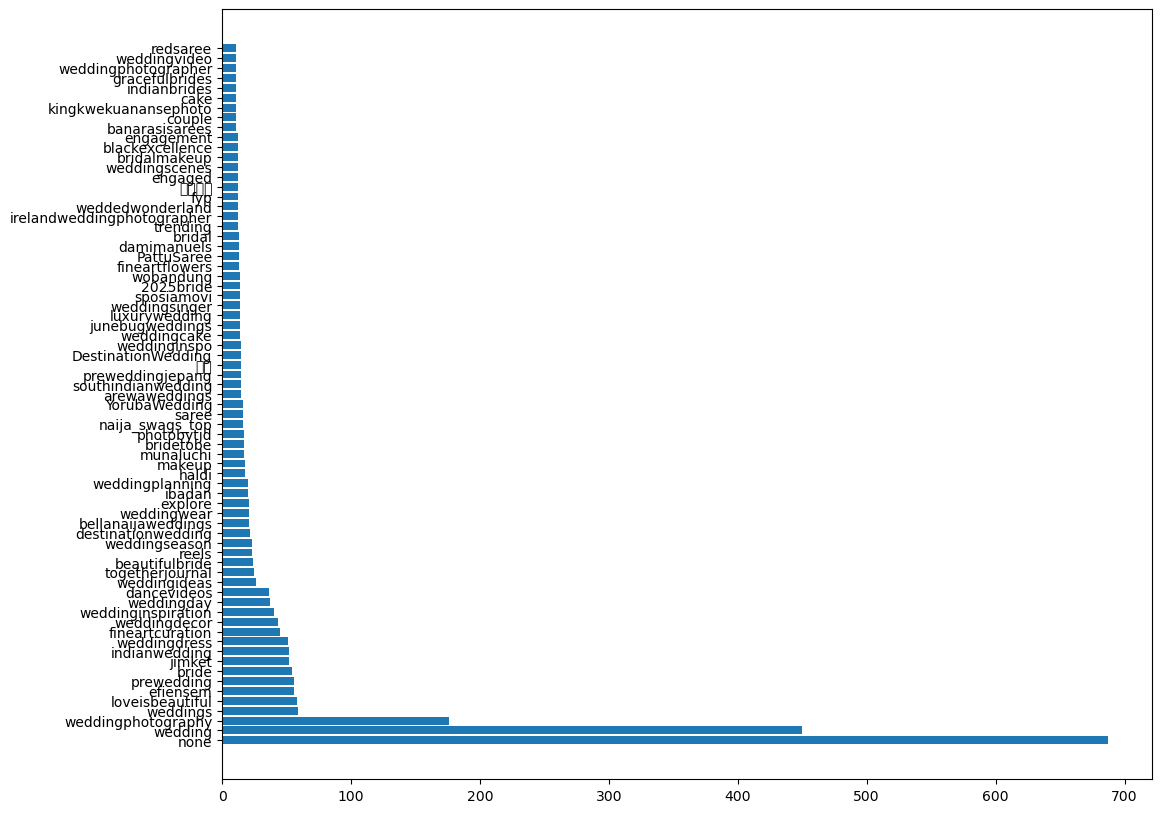

In [45]:
hashtag_count = df['hashtags/0'].value_counts()
hashtag_count1 = hashtag_count[hashtag_count > 10]
plt.figure(figsize=(12,10))
plt.barh( hashtag_count1.index,  hashtag_count1.values)

In [46]:
df.head()

,index,caption,commentsCount,dimensionsHeight,dimensionsWidth,hashtags/0,hashtags/1,hashtags/2,likesCount,productType,timestamp,type,day_of_week,popularity_index,season,hour_of_day,month_of_year
0,0,Vintage Wilton: @HansWestermark created this g...,39,1920,1080,WiltonCakes,WeddingCake,VintageCakes,880.0,clips,2025-01-09 17:30:00,Video,Thursday,627.7,Winter,17,1
1,1,HAPPY NEW YEAR ♥️♥️♥️\nMerci pour cette année ...,54,1920,1080,pavlova,meringue,pastry,2655.0,clips,2025-01-01 16:13:10,Video,Wednesday,1874.7,Winter,16,1
2,2,Я умею работать в любых условиях)\nСамое главн...,20,1920,1080,none,none,none,3.0,clips,2025-01-09 16:24:05,Video,Thursday,8.1,Winter,16,1
3,3,That didn’t go as planned \n\n@katyaa_golden,49,1920,1080,none,none,none,3.0,clips,2024-12-26 10:07:48,Video,Thursday,16.8,Winter,10,12
4,4,Dolci momenti che rendono le feste ancora più ...,19,1920,1080,none,none,none,3.0,clips,2025-01-06 09:03:56,Video,Monday,7.8,Winter,9,1


In [47]:
df["timestamp"] = pd.to_datetime(df["timestamp"].str.slice(0, 19))

# Visuals

In [48]:
hourly_engagement = df.groupby(df['hour_of_day'])['popularity_index'].mean()
daily_engagement = df.groupby(df["day_of_week"])['popularity_index'].mean()

<Axes: title={'center': 'Average Engagement by Hour of Day'}, xlabel='hour_of_day'>

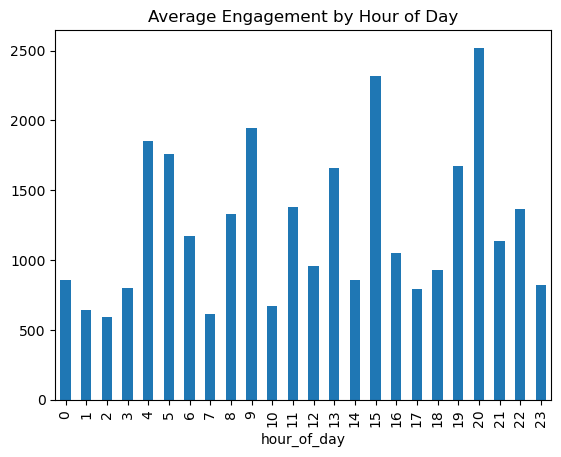

In [49]:
hourly_engagement.plot(kind='bar', title='Average Engagement by Hour of Day')


<Axes: title={'center': 'Average Engagement by Day of Week'}, xlabel='day_of_week'>

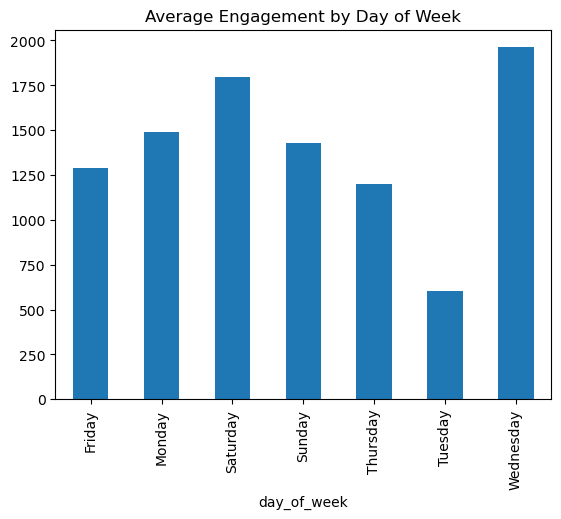

In [50]:
daily_engagement.plot(kind='bar', title="Average Engagement by Day of Week")

<Axes: xlabel='day_of_week', ylabel='hour_of_day'>

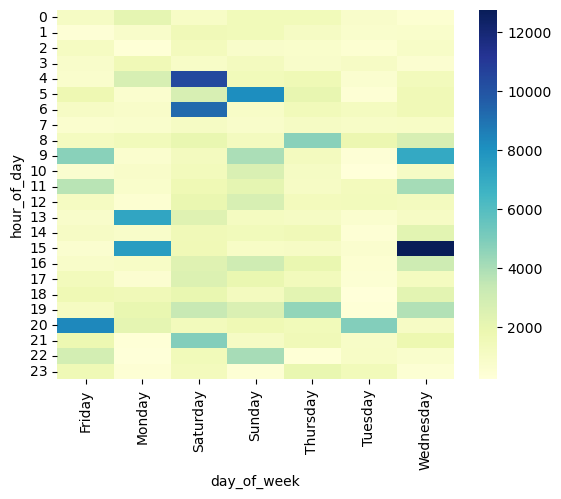

In [51]:
#Heatmap representing the times likes count are most generateed throughout the week
pivot = df.pivot_table(values='likesCount', index=df.hour_of_day, columns=df.day_of_week, aggfunc='mean')
sns.heatmap(pivot, cmap='YlGnBu')


<Axes: xlabel='timestamp'>

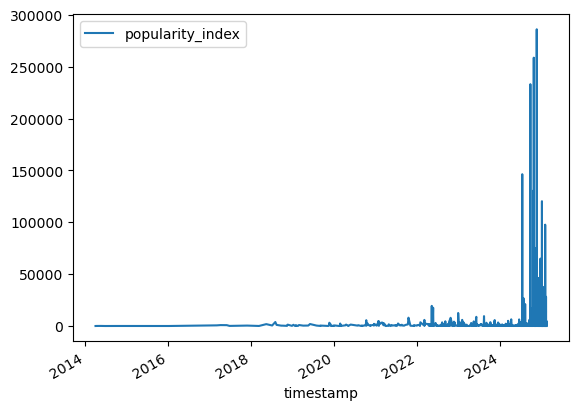

In [52]:
df.plot(kind='line', x = 'timestamp', y = 'popularity_index')

# Test Dataset

In [115]:
test_df = pd.read_csv('/Users/emeronmarcelle/Library/CloudStorage/OneDrive-Personal/Jupyter Notebook/AJ/Data_Preprocessing/filtered_IG_TEST_dataset.csv', index_col= 0)

In [116]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1595 entries, 0 to 1614
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   caption           1595 non-null   object 
 1   commentsCount     1595 non-null   int64  
 2   dimensionsHeight  1595 non-null   int64  
 3   dimensionsWidth   1595 non-null   int64  
 4   id                1595 non-null   int64  
 5   likesCount        1595 non-null   float64
 6   ownerFullName     1584 non-null   object 
 7   ownerId           1595 non-null   int64  
 8   ownerUsername     1595 non-null   object 
 9   productType       1595 non-null   object 
 10  timestamp         1595 non-null   object 
 11  type              1595 non-null   object 
 12  hashtags/0        1595 non-null   object 
 13  hashtags/1        1595 non-null   object 
 14  hashtags/2        1595 non-null   object 
 15  day_of_week       1595 non-null   object 
 16  hour_of_day       1595 non-null   int64  
 17  

In [117]:
test_df.head()

,caption,commentsCount,dimensionsHeight,dimensionsWidth,id,likesCount,ownerFullName,ownerId,ownerUsername,productType,timestamp,type,hashtags/0,hashtags/1,hashtags/2,day_of_week,hour_of_day,month_of_year,season,popularity_index
0,Natural lighting 101 ☀️,15,1920,1080,3049722787687161846,613.0,Muñoz Photography | Luxury Wedding Photographer,424290626,munozphotography,clips,2023-03-02 16:44:36,Video,none,none,none,Thursday,16,3,Winter,433.6
1,Do you like these tips + want more? \n\nYou ca...,19,1904,1072,2647519894980893520,1005.0,Sara Monika | Documentary Wedding Photographer,197725332,saramonikaphoto,clips,2021-08-24 18:17:14,Video,torontoweddingphotographer,weddingphotographytips,weddingphotographycourse,Tuesday,18,8,Summer,709.2
2,Reception tables aren’t just decor—they’re par...,98,1920,1080,3515775008874257508,4391.0,LILLY RED • Italy Photographer & Educator,14803492,elisabettalillyred,clips,2024-12-04 17:25:37,Video,WeddingPhotographyTips,weddingphotography,WeddingReception,Wednesday,17,12,Fall,3103.1
3,مفيش مصوّر هيقدر يصور حد و يطلع منه صور حلوة ا...,16,1920,1080,3115701712350629837,1360.0,Mazin Morsi - Wedding Photographer,1007055294,mazinmorsi_ph,clips,2023-06-01 17:33:32,Video,weddingphotographytips,weddngstyledshoot,weddingstylebymagazine,Thursday,17,6,Spring,956.8
4,Preboda Álvaro y Cristina \n.\n.\n.\n#weddingp...,10,612,612,3566376480167776188,67.0,DaniGom - Fotógrafo de Bodas,44924910711,danideboda,carousel_container,2025-02-12 13:00:00,Sidecar,weddingphotography,weddingphotographer,weddingphoto,Wednesday,13,2,Winter,49.9


# Train Test Split

In [71]:
features = 'timestamp'
X = df.loc[:, features]
y = df.loc[:,'popularity_index']

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 2)

# Season Model

In [67]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet
from sklearn.metrics import mean_absolute_error

In [51]:
time_df = df.set_index('timestamp')

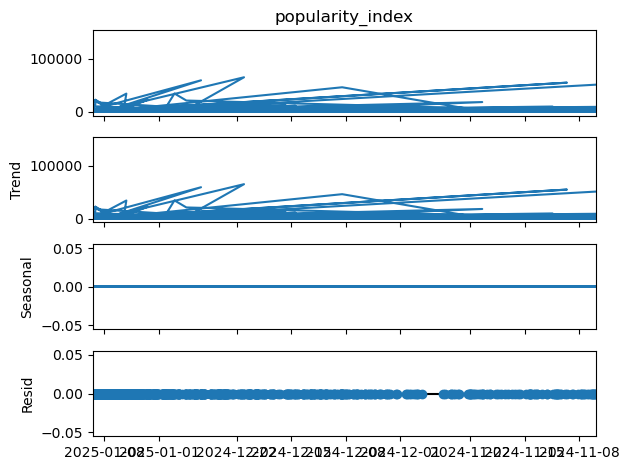

<Figure size 800x1200 with 0 Axes>

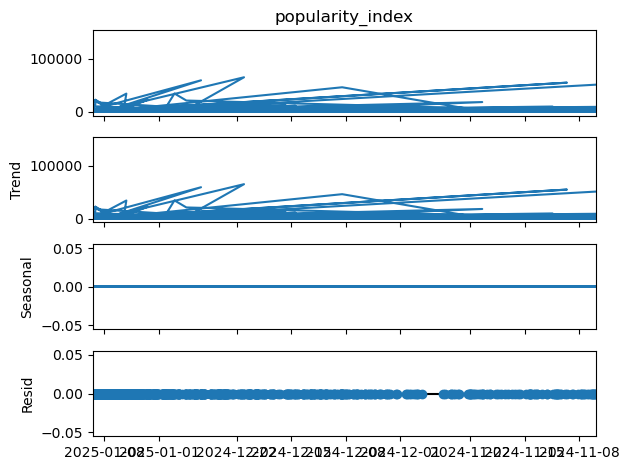

In [60]:
#Use seasonal decomposition to understand trends, seasonality, and residuals
decomposition = seasonal_decompose(time_df['popularity_index'], model='additive', period=1)
plt.figure(figsize=(8,12))
decomposition.plot()

In [73]:
#Fit an ARIMA model to predict future engagement
#NOTE: Dataset needs to contain all numeric columns
model = ARIMA(X_train, order=(1, 1, 1))
results = model.fit()
forecast = results.forecast(steps=len(test))

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


UFuncTypeError: ufunc 'subtract' cannot use operands with types dtype('<m8[ns]') and dtype('O')

# Prophet Model (Facebook Time Series Library)

In [85]:
prophet_df = df[['timestamp', 'popularity_index']]
prophet_df.columns = ['ds', 'y']
prophet_df = prophet_df.sort_values('ds')
split_index = int(len(prophet_df) * .8)
train_df = prophet_df.iloc[:split_index]
test_df = prophet_df.iloc[split_index:]
print(train_df.info(), test_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1924 entries, 1785 to 1478
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      1924 non-null   datetime64[ns]
 1   y       1924 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 45.1 KB
<class 'pandas.core.frame.DataFrame'>
Index: 482 entries, 270 to 1762
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      482 non-null    datetime64[ns]
 1   y       482 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 11.3 KB
None None


In [83]:
model = Prophet()
model.fit(train_df)
future = model.make_future_dataframe(periods=len(test_df))
forecast = model.predict(future)
#print('Forecast:', forecast)

15:01:33 - cmdstanpy - INFO - Chain [1] start processing
15:01:33 - cmdstanpy - INFO - Chain [1] done processing


In [81]:
forecast_test = forecast.iloc[-len(test_df):]
mae = mean_absolute_error(test_df['y'], forecast_test['yhat'])
print('Mean absolute error:', mae)

Mean absolute error: 2015.2621125064518


In [82]:
print("Mean popularity_index:", prophet_df['y'].mean())
print("Standard deviation of popularity_index:", prophet_df['y'].std())

Mean popularity_index: 970.0852452202824
Standard deviation of popularity_index: 5014.076630826752


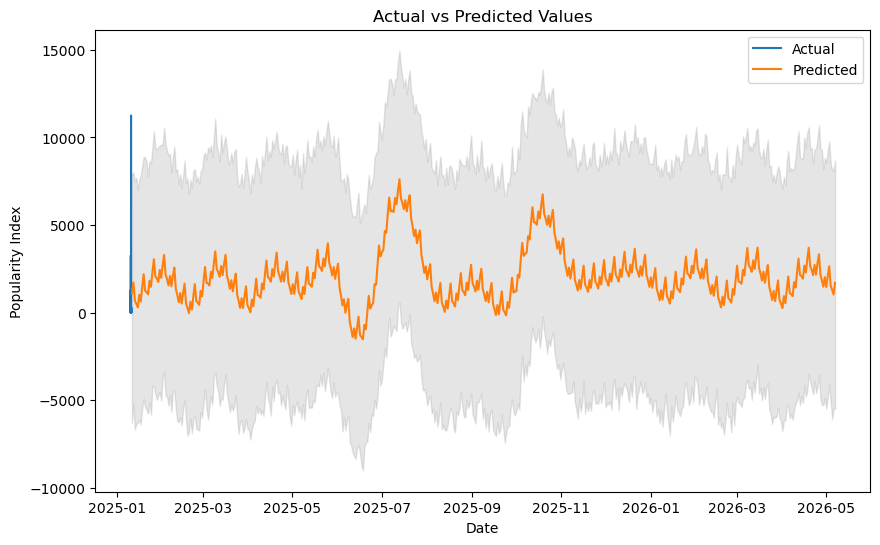

In [84]:
plt.figure(figsize=(10, 6))
plt.plot(test_df['ds'], test_df['y'], label='Actual')
plt.plot(forecast_test['ds'], forecast_test['yhat'], label='Predicted')
plt.fill_between(forecast_test['ds'], forecast_test['yhat_lower'], forecast_test['yhat_upper'], color='gray', alpha=0.2)
plt.legend()
plt.title('Actual vs Predicted Values')
plt.xlabel('Date')
plt.ylabel('Popularity Index')
plt.show()

# Gradient Boosting
Predict the popularity_index using Gradient Boosting

In [53]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4132 entries, 0 to 4131
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             4132 non-null   int64  
 1   caption           4132 non-null   object 
 2   commentsCount     4132 non-null   int64  
 3   dimensionsHeight  4132 non-null   int64  
 4   dimensionsWidth   4132 non-null   int64  
 5   hashtags/0        4132 non-null   object 
 6   hashtags/1        4132 non-null   object 
 7   hashtags/2        4132 non-null   object 
 8   likesCount        4132 non-null   float64
 9   ownerId           4132 non-null   int64  
 10  productType       4132 non-null   object 
 11  timestamp         4132 non-null   object 
 12  type              4132 non-null   object 
 13  day_of_week       4132 non-null   object 
 14  popularity_index  4132 non-null   float64
 15  season            4132 non-null   object 
 16  hour_of_day       4132 non-null   int64  


In [54]:
filtered_df = df[['productType','type','day_of_week','season', 'month_of_year']]

In [60]:
filtered_df[categorical_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7580 entries, 0 to 7579
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   productType    7580 non-null   object
 1   type           7580 non-null   object
 2   day_of_week    7580 non-null   object
 3   season         7580 non-null   object
 4   month_of_year  7580 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 296.2+ KB


In [92]:
#Convert the categorical features
categorical_cols = ['productType','type','day_of_week','season', 'month_of_year']

"""OHE = OneHotEncoder()
filtered_df.loc[:,col] = OHE.fit_transform(filtered_df[categorical_cols])"""


# Drop the caption and target column, then one-hot encode the categorical columns.
cat_filtered_df = pd.get_dummies(
    filtered_df,
    columns= categorical_cols
)

In [98]:
cat_filtered_df.head()

,popularity_category,type_Image,type_Sidecar,type_Video,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,...,month_of_year_3,month_of_year_4,month_of_year_5,month_of_year_6,month_of_year_7,month_of_year_8,month_of_year_9,month_of_year_10,month_of_year_11,month_of_year_12
0,2,False,False,True,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,2,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0,False,False,True,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,0,False,False,True,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
4,0,False,False,True,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [95]:
X = filtered_df
y = df['popularity_index']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [97]:
X_train

,productType,type,day_of_week,season,month_of_year,popularity_category
6305,NaN,Image,Tuesday,Winter,2,0
1082,NaN,Image,Friday,Winter,1,0
5475,NaN,Video,Saturday,Spring,6,1
4217,NaN,Sidecar,Saturday,Winter,1,2
6230,NaN,Video,Saturday,Winter,1,0
...,...,...,...,...,...,...
3606,NaN,Video,Monday,Winter,1,0
5704,NaN,Image,Tuesday,Summer,8,2
6637,NaN,Video,Thursday,Winter,1,2
2575,NaN,Video,Tuesday,Winter,1,2


In [96]:
#Train the data
gbr = GradientBoostingRegressor(n_estimators=85, learning_rate=0.1, max_depth=2, random_state=2)
# Fit the model
gbr.fit(X_train, y_train)
#Evaluate the Model performance
y_pred = gbr.predict(X_test)
gbr_mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print('Mean absolute Error:', gbr_mae)
print('Root mean squared error:', rmse)

ValueError: could not convert string to float: 'Image'

In [227]:
#Train the data
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=2)
# Fit the model
gbr.fit(X_train, y_train)
#Evaluate the Model performance
y_pred = gbr.predict(X_test)
gbr_mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print('Mean absolute Error:', gbr_mae)
print('Root mean squared error:', rmse)

Mean absolute Error: 1526.576604035781
Root mean squared error: 4045.5155879177455


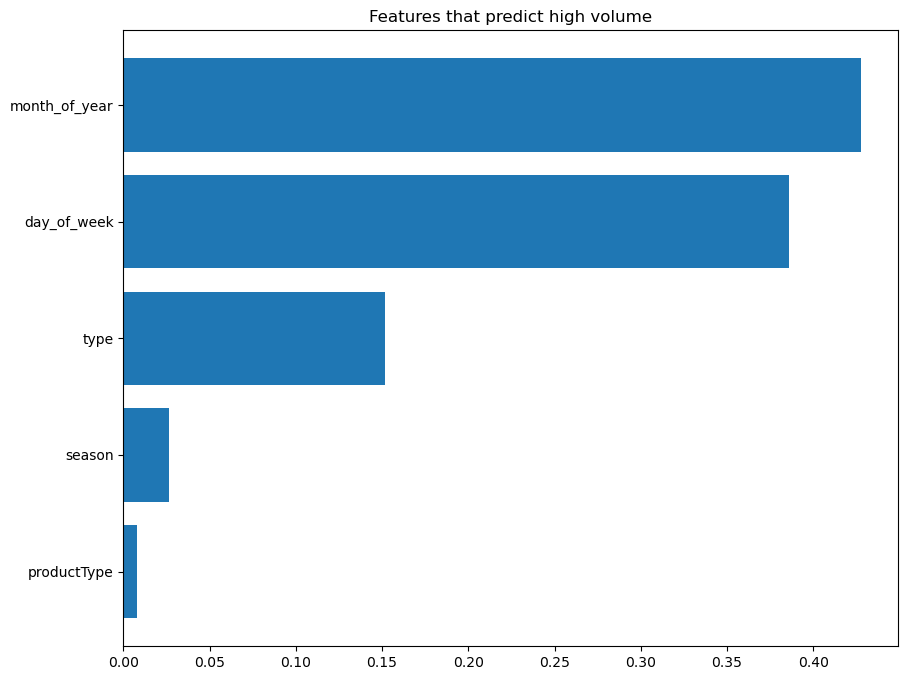

In [228]:
#View feature Importance
feature_importance = gbr.feature_importances_
sorted_idx = feature_importance.argsort()
sorted_idx
plt.figure(figsize =(10,8))
plt.barh(X.columns[sorted_idx], feature_importance[sorted_idx])
plt.title('Features that predict high volume')
plt.show()

In [229]:
# Predict for new data
new_data = X_test.iloc[:5]
predictions = gbr.predict(new_data)
print("Actual Data:", new_data)
print("Predicted Popularity index:", predictions)

Actual Data:      productType type day_of_week season  month_of_year
1028           0    1           2      3              0
2193           0    1           0      0             11
922            1    2           4      3              0
3938           1    2           1      3              0
1082           2    0           0      3              0
Predicted Popularity index: [ 890.76919312 1141.76385067  946.24465382  447.77890098 1239.19664856]


# Hyper parameter tuning

In [159]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [235]:
rs = RandomizedSearchCV(estimator = RandomForestRegressor(),
                       param_distributions= { 
                        'max_depth': list(range(40,100)), 'n_estimators': list(range(53,150))},
                       n_iter=10, scoring='neg_mean_absolute_error', n_jobs=4, return_train_score=True)

rs.fit(X_train,y_train)

python(19386) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19387) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19388) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19389) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


RandomizedSearchCV(estimator=RandomForestRegressor(), n_jobs=4,
                   param_distributions={'max_depth': [40, 41, 42, 43, 44, 45,
                                                      46, 47, 48, 49, 50, 51,
                                                      52, 53, 54, 55, 56, 57,
                                                      58, 59, 60, 61, 62, 63,
                                                      64, 65, 66, 67, 68, 69, ...],
                                        'n_estimators': [53, 54, 55, 56, 57, 58,
                                                         59, 60, 61, 62, 63, 64,
                                                         65, 66, 67, 68, 69, 70,
                                                         71, 72, 73, 74, 75, 76,
                                                         77, 78, 79, 80, 81, 82, ...]},
                   return_train_score=True, scoring='neg_mean_absolute_error')

In [236]:
# Add caption and hashtags to features.
rs.best_params_

{'n_estimators': 61, 'max_depth': 73}

In [165]:
gs = GridSearchCV(estimator = GradientBoostingRegressor(),
                       param_grid= {'learning_rate': np.linspace(0.1,2,20), 
                        'max_depth': list(range(1,10)), 'n_estimators': list(range(85,115))},
                       scoring='neg_mean_absolute_error', n_jobs=4, return_train_score=True)

gs.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingRegressor(), n_jobs=4,
             param_grid={'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]),
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'n_estimators': [85, 86, 87, 88, 89, 90, 91, 92, 93,
                                          94, 95, 96, 97, 98, 99, 100, 101, 102,
                                          103, 104, 105, 106, 107, 108, 109,
                                          110, 111, 112, 113, 114]},
             return_train_score=True, scoring='neg_mean_absolute_error')

In [166]:
gs.best_score_

-1068.7639329930798

In [167]:
gs.best_params_

{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 85}

In [170]:
gs.get_params

<bound method BaseEstimator.get_params of GridSearchCV(estimator=GradientBoostingRegressor(), n_jobs=4,
             param_grid={'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]),
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'n_estimators': [85, 86, 87, 88, 89, 90, 91, 92, 93,
                                          94, 95, 96, 97, 98, 99, 100, 101, 102,
                                          103, 104, 105, 106, 107, 108, 109,
                                          110, 111, 112, 113, 114]},
             return_train_score=True, scoring='neg_mean_absolute_error')>

# Random Foreset Regressor

In [174]:
from sklearn.ensemble import RandomForestRegressor

In [230]:
rfc = RandomForestRegressor(n_estimators=45, max_depth=54, random_state=2)
rfc.fit(X_train, y_train)

RandomForestRegressor(max_depth=54, n_estimators=45, random_state=2)

In [231]:
rfc_feature_importance = rfc.feature_importances_
rfc_feature_importance_df = pd.DataFrame({'Feature':filtered_df.columns, 'Importance':rfc_feature_importance})
rfc_feature_importance_df.sort_values(by='Importance', ascending=False)
rfc_feature_importance_df

,Feature,Importance
0,productType,0.047925
1,type,0.180106
2,day_of_week,0.407070
3,season,0.041248
4,month_of_year,0.323651


In [232]:
mse_y_predict = rfc.predict(X_test)
mse_rfc = mean_absolute_error(mse_y_predict, y_test)
mse_rfc

1655.188836117444

In [237]:
rfc = RandomForestRegressor(n_estimators=61, max_depth=73, random_state=2)
rfc.fit(X_train, y_train)

RandomForestRegressor(max_depth=73, n_estimators=61, random_state=2)

In [238]:
mse_y_predict = rfc.predict(X_test)
mse_rfc = mean_absolute_error(mse_y_predict, y_test)
mse_rfc

1625.2545359223327

In [193]:
gs = GridSearchCV(estimator = RandomForestRegressor(),
                       param_grid= {'max_depth': list(range(45,55)), 'n_estimators': list(range(45,60))},
                       scoring='neg_mean_absolute_error', n_jobs=4, return_train_score=True)

gs.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(), n_jobs=4,
             param_grid={'max_depth': [45, 46, 47, 48, 49, 50, 51, 52, 53, 54],
                         'n_estimators': [45, 46, 47, 48, 49, 50, 51, 52, 53,
                                          54, 55, 56, 57, 58, 59]},
             return_train_score=True, scoring='neg_mean_absolute_error')

In [194]:
gs.best_params_

{'max_depth': 54, 'n_estimators': 45}

In [195]:
gs.best_score_

-1098.4760046589329

# Complete neural network "Low", "Medium", "High"

## Notes
After balancing the bins to have equal amount of low, medium, and high features the accuracy of the Neural Network decreased from 78% to 48%

In [85]:
filtered_df['popularity_category'] = pd.cut(df['popularity_index'],
                                            bins=[-1,100,600, float('inf')], labels=[0,1,2])
filtered_df.head(10)

/var/folders/yp/nnhfbx9n055106j0nvvkcwlr0000gn/T/ipykernel_15884/1114035058.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['popularity_category'] = pd.cut(df['popularity_index'],


,productType,type,day_of_week,season,month_of_year,popularity_category
0,clips,Video,Thursday,Winter,1,2
1,clips,Video,Wednesday,Winter,1,2
2,clips,Video,Thursday,Winter,1,0
3,clips,Video,Thursday,Winter,12,0
4,clips,Video,Monday,Winter,1,0
5,carousel_container,Sidecar,Friday,Winter,1,1
6,clips,Video,Friday,Winter,1,0
7,carousel_container,Sidecar,Thursday,Fall,12,0
8,carousel_container,Sidecar,Thursday,Winter,1,2
9,carousel_container,Sidecar,Thursday,Winter,1,0


In [86]:
filtered_df.popularity_category.value_counts()

popularity_category
0    2792
1    2397
2    2391
Name: count, dtype: int64

In [80]:
#May not be needed. Other predict_popularity funciton exists
def predict_popularity():
    """Asks the user for post details, formats input, and predicts popularity."""
    
    # Step 1: Ask for user input
    product_type = int(input("Enter product type (0:clips, 1:carousel container, 2:feed, 3:igtv): "))
    post_type = int(input("Enter post type (0:Video, 1:sidecar, 3:Image): "))
    day_of_week = int(input("Enter day of the week (0=Monday, 6=Sunday): "))
    season = int(input("Enter season (0=Winter, 1=Spring, 2=Summer, 3=Fall): "))
    month_of_year = int(input("Enter month (0-11): "))

    # Step 2: Format input as a DataFrame
    user_data = pd.DataFrame({
        "productType": [product_type],
        "type": [post_type],
        "day_of_week": [day_of_week],
        "season": [season],
        "month_of_year": [month_of_year]
    })

    # Step 3: Make the prediction
    prediction = model.predict(user_data)
    
    # Step 4: Display result
    popularity_map = {0: "Low", 1: "Medium", 2: "High"}  # Adjust based on your categories
    predicted_label = popularity_map.get(int(prediction.flatten()[0]), "Unknown")



    
    print(f"\nPredicted Popularity Category: {predicted_label}")

# Run the function
predict_popularity()

Enter product type (0:clips, 1:carousel container, 2:feed, 3:igtv): 0
Enter post type (0:Video, 1:sidecar, 3:Image): 3
Enter day of the week (0=Monday, 6=Sunday): 0
Enter season (0=Winter, 1=Spring, 2=Summer, 3=Fall): 0
Enter month (0-11): 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step

Predicted Popularity Category: Low


# Regression Neural Network Model

### The caption and hashtags fields contain textual data that can be used to predict popularity_index.


In [113]:
token_filtered_df = df[['caption','dimensionsHeight', 'dimensionsWidth','productType','type','day_of_week','season', 'month_of_year', 'popularity_index']]
token_filtered_df.head()
token_filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7580 entries, 0 to 7579
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   caption           7580 non-null   object 
 1   dimensionsHeight  7580 non-null   int64  
 2   dimensionsWidth   7580 non-null   int64  
 3   productType       7580 non-null   object 
 4   type              7580 non-null   object 
 5   day_of_week       7580 non-null   object 
 6   season            7580 non-null   object 
 7   month_of_year     7580 non-null   int64  
 8   popularity_index  7580 non-null   float64
dtypes: float64(1), int64(3), object(5)
memory usage: 533.1+ KB


In [88]:
# -----------------------------
# Data Preparation
# -----------------------------

# Assume token_filtered_df (and df for caption) are already defined as in your example.

# --- Process Structured Features ---
# Drop the caption and target column, then one-hot encode the categorical columns.
X_structured_df = pd.get_dummies(
    token_filtered_df.drop(['popularity_index', 'caption'], axis=1),
    columns=['productType', 'type', 'day_of_week', 'season', 'month_of_year']
)

# Scale numeric features
scaler = StandardScaler()
numeric_cols = ['dimensionsHeight', 'dimensionsWidth']
X_structured_df[numeric_cols] = scaler.fit_transform(X_structured_df[numeric_cols])

# Convert to a NumPy array with a proper numeric dtype.
X_structured = X_structured_df.values.astype('float32')

# --- Process Text Features ---
# Extract the caption column (make sure it's a string)
captions = token_filtered_df['caption'].astype(str).tolist()

# Tokenize the captions
max_words = 5000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(captions)
sequences = tokenizer.texts_to_sequences(captions)

# Pad sequences to a fixed length
maxlen = 50
X_text = pad_sequences(sequences, maxlen=maxlen).astype('int32')

# --- Process Target Variable ---
y = token_filtered_df['popularity_index'].values.astype('float32')

# -----------------------------
# Constructing the Neural Network Model
# -----------------------------

# --- Structured Input Branch ---
structured_input = Input(shape=(X_structured.shape[1],), name='structured_input')
x_struct = Dense(64, activation='relu', name='dense_struct_1')(structured_input)
x_struct = Dropout(0.3, name='dropout_struct_1')(x_struct)
x_struct = Dense(32, activation='relu', name='dense_struct_2')(x_struct)

# --- Text Input Branch ---
text_input = Input(shape=(maxlen,), name='text_input')
x_text = Embedding(input_dim=max_words, output_dim=50, input_length=maxlen, name='embedding')(text_input)
x_text = Conv1D(filters=64, kernel_size=3, activation='relu', name='conv1d')(x_text)
x_text = GlobalMaxPooling1D(name='global_max_pool')(x_text)
x_text = Dense(32, activation='relu', name='dense_text')(x_text)

# --- Combine Branches ---
combined = Concatenate(name='concatenate')([x_struct, x_text])
x = Dense(64, activation='relu', name='dense_combined_1')(combined)
x = Dropout(0.3, name='dropout_combined')(x)
x = Dense(32, activation='relu', name='dense_combined_2')(x)
output = Dense(1, activation='linear', name='output')(x)

# Create and compile the model
regression_model = Model(inputs=[structured_input, text_input], outputs=output)
regression_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# Display the model summary
regression_model.summary()

# -----------------------------
# Train the Model
# -----------------------------
regression_history = regression_model.fit(
    [X_structured, X_text],
    y,
    epochs=50,
    batch_size=32,
    validation_split=0.2
)


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ text_input          │ (None, 50)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ structured_input    │ (None, 32)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 50, 50)    │    250,000 │ text_input[0][0]  │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_struct_1      │ (None, 64)        │      2,112 │ structured_input… │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d (Conv1D)     │ (None, 48, 64)    │      9,664 │ embedding[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_struct_1    │ (None, 64)        │          0 │ dense_struct_1[0… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pool     │ (None, 64)        │          0 │ conv1d[0][0]      │
│ (GlobalMaxPooling1… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_struct_2      │ (None, 32)        │      2,080 │ dropout_struct_1… │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_text (Dense)  │ (None, 32)        │      2,080 │ global_max_pool[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 64)        │          0 │ dense_struct_2[0… │
│ (Concatenate)       │                   │            │ dense_text[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_combined_1    │ (None, 64)        │      4,160 │ concatenate[0][0] │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_combined    │ (None, 64)        │          0 │ dense_combined_1… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_combined_2    │ (None, 32)        │      2,080 │ dropout_combined… │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output (Dense)      │ (None, 1)         │         33 │ dense_combined_2… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 272,209 (1.04 MB)

 Trainable params: 272,209 (1.04 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
190/190 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 69921728.0000 - mae: 1350.3896 - val_loss: 106670704.0000 - val_mae: 1735.6235
Epoch 2/50
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 66491892.0000 - mae: 1543.5751 - val_loss: 105849936.0000 - val_mae: 1695.5210
Epoch 3/50
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 35185724.0000 - mae: 1333.2946 - val_loss: 103847464.0000 - val_mae: 1629.0469
Epoch 4/50
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 41703272.0000 - mae: 1356.5905 - val_loss: 99841512.0000 - val_mae: 1458.5903
Epoch 5/50
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 38884336.0000 - mae: 1312.8986 - val_loss: 92722264.0000 - val_mae: 1342.4785
Epoch 6/50
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 42883240.0000 - mae: 1269.8010 - val_loss: 82254784.0000 - val_mae: 1337.3879
Epoch 7/50
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 34137000.0000 - mae: 1180.2173 - val_loss: 66405788.0000 - val_mae: 1240.4298
Epoch 8/50
190/190 ━━━━━━━━━━━━

190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4325037.0000 - mae: 569.7410 - val_loss: 2455448.2500 - val_mae: 532.1130
Epoch 50/50
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2601868.0000 - mae: 539.9645 - val_loss: 2542803.0000 - val_mae: 558.7476


### Save Model

In [20]:
model.save('RegressionModel.keras')

### Load Model

In [ ]:
regression_model = load_model('RegressionModel.keras')

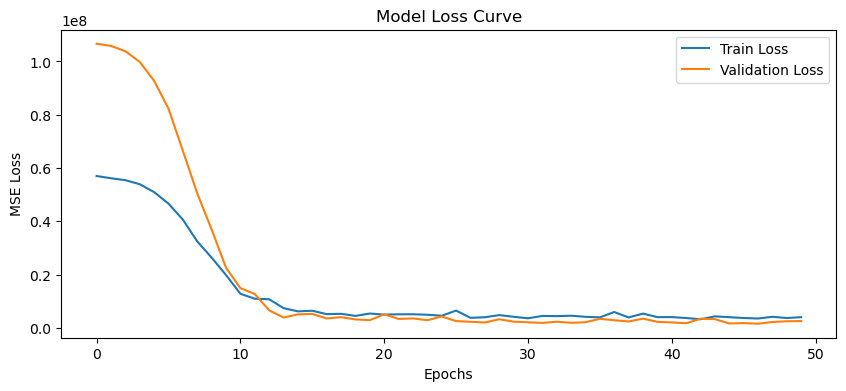

In [100]:
# Extract training history
''' 
What to look for?
If validation loss increases → Overfitting.
If both losses are high → Underfitting (model too simple).
'''
history_dict = regression_history.history

# Plot Loss
plt.figure(figsize=(10, 4))
plt.plot(history_dict['loss'], label='Train Loss')
plt.plot(history_dict['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend()
plt.title('Model Loss Curve')
plt.show()

# Test the model

In [101]:
def predict_popularity(new_df, model, tokenizer, scaler, structured_columns, maxlen=50):
    """
    Predicts popularity_index for new data using the trained multi-input model.
    
    Parameters:
    - new_df (pd.DataFrame): New data with the following columns:
         'caption', 'dimensionsHeight', 'dimensionsWidth',
         'productType', 'type', 'day_of_week', 'season', 'month_of_year'
         (Note: new_df should not include the target column 'popularity_index'.)
    - model (tf.keras.Model): The trained Keras model.
    - tokenizer (Tokenizer): The fitted Keras Tokenizer from training.
    - scaler (StandardScaler): The fitted StandardScaler for numeric features.
    - structured_columns (list or pd.Index): Column names of the structured features as 
         produced by get_dummies on the training set.
    - maxlen (int): Maximum length for padded sequences (default is 50).
    
    Returns:
    - predictions (np.ndarray): The predicted popularity_index values.
    """
    # --- Process Structured Features ---
    # Drop the 'caption' column (we'll process it separately).
    structured_data = new_df.drop('caption', axis=1)
    
    # Apply one-hot encoding to the categorical columns.
    # Ensure you use the same columns as in training: 
    # 'productType', 'type', 'day_of_week', 'season', 'month_of_year'
    structured_data = pd.get_dummies(
        structured_data,
        columns=['productType', 'type', 'day_of_week', 'season', 'month_of_year']
    )
    
    # Reindex the DataFrame to ensure it has the same columns as used in training.
    # Any missing columns (because a new category is not present) will be filled with 0.
    structured_data = structured_data.reindex(columns=structured_columns, fill_value=0)
    
    # Scale the numeric columns using the same scaler that was fitted on the training data.
    # (Assuming the numeric columns are named 'dimensionsHeight' and 'dimensionsWidth'.)
    # Even if these columns exist in structured_data, the scaler must be applied to those columns.
    structured_data[['dimensionsHeight', 'dimensionsWidth']] = scaler.transform(
        structured_data[['dimensionsHeight', 'dimensionsWidth']]
    )
    
    # Convert the structured features to a float32 numpy array.
    X_structured = structured_data.values.astype('float32')
    
    # --- Process Text Features ---
    # Get the 'caption' column as a list of strings.
    captions = new_df['caption'].astype(str).tolist()
    
    # Convert the captions to sequences using the previously fitted tokenizer.
    sequences = tokenizer.texts_to_sequences(captions)
    
    # Pad the sequences to the same length as during training.
    X_text = pad_sequences(sequences, maxlen=maxlen).astype('int32')
    
    # --- Make Predictions ---
    # The model expects a list of inputs: [structured_data, text_data]
    predictions = model.predict([X_structured, X_text])
    
    return predictions


In [102]:
# new_data should be a DataFrame with the columns:
# 'caption', 'dimensionsHeight', 'dimensionsWidth', 
# 'productType', 'type', 'day_of_week', 'season', 'month_of_year'
new_data = pd.DataFrame({
    'caption': ["Look at my beautiful wedding", "wedding dress"],
    'dimensionsHeight': [150, 200],
    'dimensionsWidth': [100, 120],
    'productType': ["TypeA", "TypeB"],
    'type': ["SubType1", "SubType2"],
    'day_of_week': ["Monday", "Tuesday"],
    'season': ["Summer", "Winter"],
    'month_of_year': [6, 12]
})

# structured_columns should be the list of columns you obtained from the training set.
# For example, if you saved it after get_dummies:
structured_columns = X_structured_df.columns
# Here we assume it is already defined.

# Call the predict_popularity function:
predicted_popularity = predict_popularity(new_data, regression_model, tokenizer, scaler, structured_columns)
print(predicted_popularity)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
[[221.6467 ]
 [122.20596]]


# Classification Model

In [103]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Embedding, Conv1D, GlobalMaxPooling1D, Concatenate, Dropout
from tensorflow.keras.optimizers import Adam

# -----------------------------
# Data Preparation (Classification)
# -----------------------------
# Create popularity_category from popularity_index
# Note: Make sure that the original df is used and that token_filtered_df is updated accordingly.
filtered_df = token_filtered_df.copy()
filtered_df['popularity_category'] = pd.cut(
    filtered_df['popularity_index'],
    bins=[-1,100,600, float('inf')],
    labels=[0, 1, 2]
).astype('int32')  # ensure integer type

# --- Process Structured Features ---
# Drop the caption and target column, then one-hot encode the categorical columns.
X_structured_df = pd.get_dummies(
    filtered_df.drop(['popularity_index', 'popularity_category', 'caption',
                      'dimensionsHeight', 'dimensionsWidth'], axis=1),
    columns=['productType', 'type', 'day_of_week', 'season', 'month_of_year']
)

# Save the column names for later use (for new/unseen data)
structured_columns = X_structured_df.columns

# Scale numeric features
scaler = StandardScaler()
numeric_cols = ['dimensionsHeight', 'dimensionsWidth']
X_structured_df[numeric_cols] = scaler.fit_transform(X_structured_df[numeric_cols])

# Convert to a NumPy array with the proper type.
X_structured = X_structured_df.values.astype('float32')

# --- Process Text Features ---
# Extract and preprocess the caption column.
captions = filtered_df['caption'].astype(str).tolist()

max_words = 5000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(captions)
sequences = tokenizer.texts_to_sequences(captions)
maxlen = 50
X_text = pad_sequences(sequences, maxlen=maxlen).astype('int32')

# --- Process Target Variable ---
# For classification, we use the category label.
y = filtered_df['popularity_category'].values.astype('int32')

# -----------------------------
# Constructing the Classification Neural Network Model
# -----------------------------

# --- Structured Input Branch ---
structured_input = Input(shape=(X_structured.shape[1],), name='structured_input')
x_struct = Dense(64, activation='relu', name='dense_struct_1')(structured_input)
x_struct = Dropout(0.3, name='dropout_struct_1')(x_struct)
x_struct = Dense(32, activation='relu', name='dense_struct_2')(x_struct)

# --- Text Input Branch ---
text_input = Input(shape=(maxlen,), name='text_input')
x_text = Embedding(input_dim=max_words, output_dim=50, input_length=maxlen, name='embedding')(text_input)
x_text = Conv1D(filters=64, kernel_size=3, activation='relu', name='conv1d')(x_text)
x_text = GlobalMaxPooling1D(name='global_max_pool')(x_text)
x_text = Dense(32, activation='relu', name='dense_text')(x_text)

# --- Combine Branches ---
combined = Concatenate(name='concatenate')([x_struct, x_text])
x = Dense(64, activation='relu', name='dense_combined_1')(combined)
x = Dropout(0.3, name='dropout_combined')(x)
x = Dense(32, activation='relu', name='dense_combined_2')(x)

# --- Output Layer for Classification ---
# 3 neurons for 3 classes, using softmax activation.
output = Dense(3, activation='softmax', name='output')(x)

# Create the model with two inputs and one output.
classification_model = Model(inputs=[structured_input, text_input], outputs=output)

# Compile the model with a classification loss and accuracy metric.
classification_model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

classification_model.summary()

# -----------------------------
# Train the Model (Classification)
# -----------------------------
classification_history = classification_model.fit(
    [X_structured, X_text],
    y,
    epochs=30,
    batch_size=32,
    validation_split=0.2
)


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ text_input          │ (None, 50)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ structured_input    │ (None, 32)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 50, 50)    │    250,000 │ text_input[0][0]  │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_struct_1      │ (None, 64)        │      2,112 │ structured_input… │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d (Conv1D)     │ (None, 48, 64)    │      9,664 │ embedding[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_struct_1    │ (None, 64)        │          0 │ dense_struct_1[0… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pool     │ (None, 64)        │          0 │ conv1d[0][0]      │
│ (GlobalMaxPooling1… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_struct_2      │ (None, 32)        │      2,080 │ dropout_struct_1… │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_text (Dense)  │ (None, 32)        │      2,080 │ global_max_pool[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 64)        │          0 │ dense_struct_2[0… │
│ (Concatenate)       │                   │            │ dense_text[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_combined_1    │ (None, 64)        │      4,160 │ concatenate[0][0] │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_combined    │ (None, 64)        │          0 │ dense_combined_1… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_combined_2    │ (None, 32)        │      2,080 │ dropout_combined… │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output (Dense)      │ (None, 3)         │         99 │ dense_combined_2… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 272,275 (1.04 MB)

 Trainable params: 272,275 (1.04 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
190/190 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.3584 - loss: 1.0905 - val_accuracy: 0.6168 - val_loss: 0.8574
Epoch 2/30
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5694 - loss: 0.8999 - val_accuracy: 0.7995 - val_loss: 0.5090
Epoch 3/30
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7812 - loss: 0.5325 - val_accuracy: 0.9261 - val_loss: 0.2726
Epoch 4/30
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9031 - loss: 0.3100 - val_accuracy: 0.9644 - val_loss: 0.1729
Epoch 5/30
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9548 - loss: 0.1752 - val_accuracy: 0.9677 - val_loss: 0.1153
Epoch 6/30
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9639 - loss: 0.1245 - val_accuracy: 0.9743 - val_loss: 0.0858
Epoch 7/30
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9691 - loss: 0.1094 - val_accuracy: 0.9802 - val_loss: 0.0701
Epoch 8/30
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9708 - loss: 0.0963 - val_accuracy: 0.

### Save Model

In [109]:
classification_model.save('ClassificationModel2_98auc.keras')

### Load Model

In [ ]:
classification_model = load_model('RegressionModel.keras')

### Validation Metrics

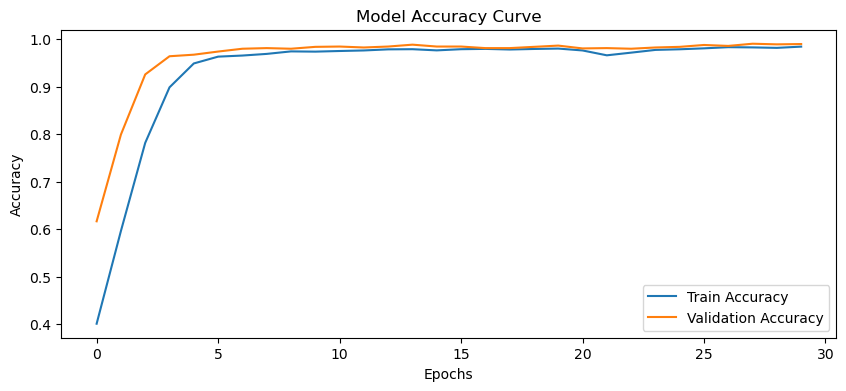

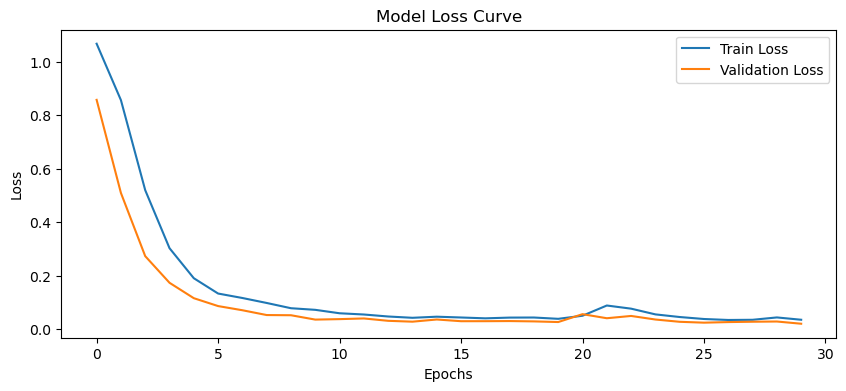

In [104]:
# Extract training history
'''
Diagonal values should be high (correct predictions).
Off-diagonal values indicate misclassifications.
If certain classes are misclassified more, your model might need class balancing or better features.
'''
history_dict = classification_history.history

# Plot Accuracy
plt.figure(figsize=(10, 4))
plt.plot(history_dict['accuracy'], label='Train Accuracy')
plt.plot(history_dict['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy Curve')
plt.show()

# Plot Loss
plt.figure(figsize=(10, 4))
plt.plot(history_dict['loss'], label='Train Loss')
plt.plot(history_dict['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss Curve')
plt.show()


237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


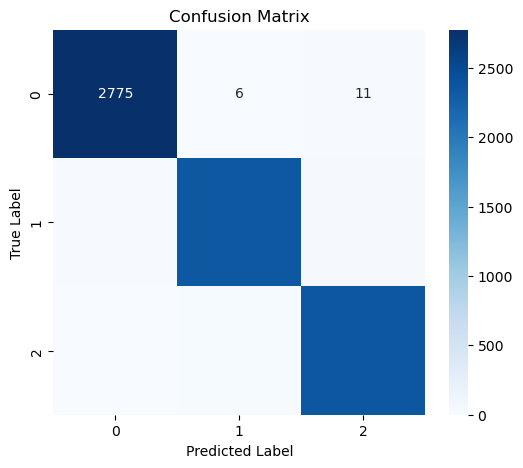

In [105]:
from sklearn.metrics import confusion_matrix
# Predict on validation data
'''
✅ What to look for?
Diagonal values should be high (correct predictions).
Off-diagonal values indicate misclassifications.
If certain classes are misclassified more, your model might need class balancing or better features.
'''

y_pred_probs = classification_model.predict([X_structured, X_text])  # Get softmax probabilities
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert to class labels

# Get actual labels from validation split
y_actual = y  # Since we don't have a test set, we use full data

# Compute confusion matrix
cm = confusion_matrix(y_actual, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [106]:
from sklearn.metrics import classification_report
'''
Precision → How many predicted positives were actually correct?
Recall → How many actual positives were identified?
F1-score → Balance of precision & recall (best is 1.0).
If one class has low recall, the model is missing those cases.
'''

print(classification_report(y_actual, y_pred, target_names=['Low', 'Medium', 'High']))


              precision    recall  f1-score   support

         Low       0.99      0.99      0.99      2792
      Medium       0.99      0.98      0.98      2397
        High       0.98      0.99      0.98      2391

    accuracy                           0.99      7580
   macro avg       0.99      0.99      0.99      7580
weighted avg       0.99      0.99      0.99      7580



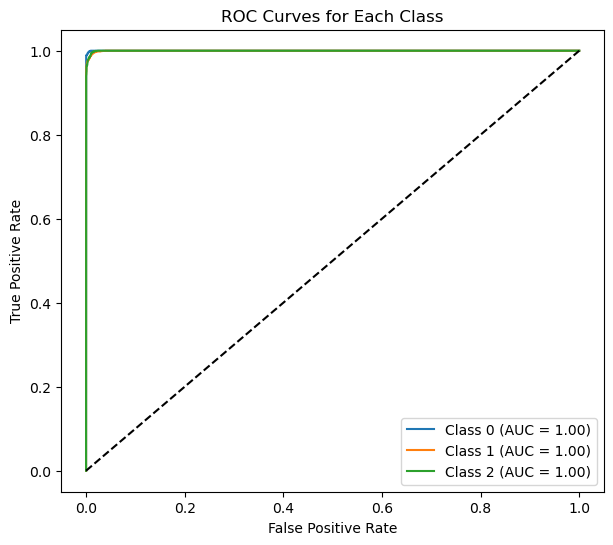

In [107]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
'''
AUC close to 1 → Excellent classifier.
AUC close to 0.5 → Poor classifier (random guessing).
If a class has much lower AUC, it means the model struggles to classify it.
'''
# Binarize the labels (needed for multi-class ROC)
y_binarized = label_binarize(y_actual, classes=[0, 1, 2])

plt.figure(figsize=(7, 6))

for i in range(3):  # Loop through 3 classes
    fpr, tpr, _ = roc_curve(y_binarized[:, i], y_pred_probs[:, i])
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {auc_score:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Random guess line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Each Class")
plt.legend()
plt.show()


### Predict popularity using Categorical Model

In [108]:
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

def predict_popularity_category(new_df, model, tokenizer, scaler, structured_columns, maxlen=50):
    """
    Predicts the popularity_category for new data using the trained classification model.
    
    Parameters:
    - new_df (pd.DataFrame): New data with the following columns:
         'caption', 'dimensionsHeight', 'dimensionsWidth',
         'productType', 'type', 'day_of_week', 'season', 'month_of_year'
         (Do not include the target column 'popularity_category'.)
    - model (tf.keras.Model): The trained Keras classification model.
    - tokenizer (Tokenizer): The fitted Keras Tokenizer used for text processing.
    - scaler (StandardScaler): The fitted StandardScaler for numeric features.
    - structured_columns (list or pd.Index): Column names of the structured features as produced
         by pd.get_dummies during training.
    - maxlen (int): Maximum length for padded text sequences (default is 50).
    
    Returns:
    - predictions (np.ndarray): The predicted popularity category (0, 1, or 2) for each row.
    """
    
    # --- Process Structured Features ---
    # Drop the 'caption' column (the text branch will handle that separately).
    structured_data = new_df.drop('caption', axis=1)
    
    # Apply one-hot encoding to the categorical columns.
    structured_data = pd.get_dummies(
        structured_data,
        columns=['productType', 'type', 'day_of_week', 'season', 'month_of_year']
    )
    
    # Reindex to match the training columns, filling missing columns with 0.
    structured_data = structured_data.reindex(columns=structured_columns, fill_value=0)
    
    # Scale the numeric columns. Assuming the numeric columns are 'dimensionsHeight' and 'dimensionsWidth'.
    structured_data[['dimensionsHeight', 'dimensionsWidth']] = scaler.transform(
        structured_data[['dimensionsHeight', 'dimensionsWidth']]
    )
    
    # Convert to a float32 numpy array.
    X_structured = structured_data.values.astype('float32')
    
    # --- Process Text Features ---
    # Ensure the 'caption' column is a list of strings.
    captions = new_df['caption'].astype(str).tolist()
    
    # Convert captions to sequences using the existing tokenizer.
    sequences = tokenizer.texts_to_sequences(captions)
    
    # Pad the sequences to the same maxlen as during training.
    X_text = pad_sequences(sequences, maxlen=maxlen).astype('int32')
    
    # --- Make Predictions ---
    # The model outputs probabilities for each class; shape: (num_samples, 3)
    probs = model.predict([X_structured, X_text])
    
    
    # Choose the class with the highest probability.
    predictions = np.argmax(probs, axis=1)
    
    answer = []
    for score in predictions:
        if score == 0:
            answer.append('Low')
        elif score == 1:
            answer.append('Medium')
        elif score == 2:
            answer.append('High')

    print(f'Scale: Low(0-100), Medium(101-600), High(601 or More)')
    return answer

# -----------------------------
# Example usage:
# -----------------------------
# new_data should be a DataFrame with the columns:
# 'caption', 'dimensionsHeight', 'dimensionsWidth', 
# 'productType', 'type', 'day_of_week', 'season', 'month_of_year'
new_data = pd.DataFrame({
    'caption': ["Amazing product, works great!", "Terrible"],
    'dimensionsHeight': [1500, 200],
    'dimensionsWidth': [1000, 120],
    'productType': ["clips", "TypeB"],
    'type': ["Video", "SubType2"],
    'day_of_week': ["Monday", "Tuesday"],
    'season': ["Summer", "Winter"],
    'month_of_year': [6, 12]
})

# Assuming that the variables 'model', 'tokenizer', 'scaler', and 'structured_columns' are defined 
# (from training), call the prediction function:
predicted_categories = predict_popularity_category(new_data, classification_model, tokenizer, scaler, structured_columns)
print("Predicted popularity categories:", predicted_categories)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Scale: Low(0-250), Medium(251-1000), High(1001 or More)
Predicted popularity categories: ['Medium', 'Low']


In [ ]:
-1,100,600,

In [43]:
X_text

array([[   0,    0,    0, ..., 2848,  743, 2609],
       [   0,    0,    0, ..., 1054,   59,  251],
       [   0,    0,    0, ..., 2850,   77, 3899],
       ...,
       [   0,    0,    0, ...,  517,  192,  192],
       [   0,    0,    0, ...,  658, 1948,   44],
       [1475,  184,   19, ...,  773,  490,  170]], dtype=int32)

In [36]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4132 entries, 0 to 4131
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   caption              4132 non-null   object 
 1   dimensionsHeight     4132 non-null   int64  
 2   dimensionsWidth      4132 non-null   int64  
 3   productType          4132 non-null   object 
 4   type                 4132 non-null   object 
 5   day_of_week          4132 non-null   object 
 6   season               4132 non-null   object 
 7   month_of_year        4132 non-null   int64  
 8   popularity_index     4132 non-null   float64
 9   popularity_category  4132 non-null   int32  
dtypes: float64(1), int32(1), int64(3), object(5)
memory usage: 306.8+ KB


In [125]:
hashtag_filtered_df.popularity_category.value_counts()


popularity_category
0    2792
1    2397
2    2391
Name: count, dtype: int64

# Classification Model With hashtags

In [37]:
hashtag_columns = ['caption','dimensionsHeight', 'dimensionsWidth','hashtags/0','hashtags/1',
                   'hashtags/2','productType','type','day_of_week','season', 'month_of_year','popularity_index']
hashtag_filtered_df = df[hashtag_columns]

In [111]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Embedding, Conv1D, GlobalMaxPooling1D, Concatenate, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# ===========================================
# Data Preparation (Classification with Hashtags)
# ===========================================

# Assume df is your original DataFrame that includes the hashtag columns.
hashtag_columns = ['caption','dimensionsHeight', 'dimensionsWidth',
                   'hashtags/0','hashtags/1','hashtags/2',
                   'productType','type','day_of_week','season', 'month_of_year','popularity_index']
hashtag_filtered_df = df[hashtag_columns].copy()

# Create popularity_category from popularity_index.
# (Categories: 0 for low, 1 for medium, 2 for high popularity)
hashtag_filtered_df['popularity_category'] = pd.cut(
    hashtag_filtered_df['popularity_index'],
    bins=[-1,100,600, float('inf')],
    labels=[0, 1, 2]
).astype('int32')  # ensure integer type

# ---- Structured Features ----
# For the structured branch, we remove the text features:
# 'caption' and the hashtag columns.
structured_cols_to_drop = ['popularity_index', 'popularity_category', 'caption',
                             'hashtags/0','hashtags/1','hashtags/2']
X_structured_df = pd.get_dummies(
    hashtag_filtered_df.drop(structured_cols_to_drop, axis=1),
    columns=['productType', 'type', 'day_of_week', 'season', 'month_of_year']
)

# Save the structured column names for future use (e.g. for new data)
structured_columns = X_structured_df.columns

# Scale the numeric features.
scaler = StandardScaler()
numeric_cols = ['dimensionsHeight', 'dimensionsWidth']
X_structured_df[numeric_cols] = scaler.fit_transform(X_structured_df[numeric_cols])

# Convert to a NumPy array.
X_structured = X_structured_df.values.astype('float32')

# ---- Caption Text Features ----
captions = hashtag_filtered_df['caption'].astype(str).tolist()
max_words_caption = 5000  # vocabulary size for captions
caption_tokenizer = Tokenizer(num_words=max_words_caption)
caption_tokenizer.fit_on_texts(captions)
caption_sequences = caption_tokenizer.texts_to_sequences(captions)
maxlen_caption = 50
X_text = pad_sequences(caption_sequences, maxlen=maxlen_caption).astype('int32')

# ---- Hashtag Features ----
# Combine the three hashtag columns into one string per sample.
# (You can adjust the separator if needed.)
hashtags_combined = hashtag_filtered_df[['hashtags/0', 'hashtags/1', 'hashtags/2']] \
                        .astype(str) \
                        .agg(" ".join, axis=1)

max_words_hashtag = 2000  # vocabulary size for hashtags (adjust as needed)
hashtag_tokenizer = Tokenizer(num_words=max_words_hashtag)
hashtag_tokenizer.fit_on_texts(hashtags_combined)
hashtag_sequences = hashtag_tokenizer.texts_to_sequences(hashtags_combined)

# Since we expect only a few hashtags per sample, we can set maxlen accordingly.
maxlen_hashtag = 3
X_hashtag = pad_sequences(hashtag_sequences, maxlen=maxlen_hashtag).astype('int32')

# ---- Target Variable ----
y = hashtag_filtered_df['popularity_category'].values.astype('int32')

# ===========================================
# Constructing the Multi-Input Classification Neural Network
# ===========================================

# --- Structured Input Branch ---
structured_input = Input(shape=(X_structured.shape[1],), name='structured_input')
x_struct = Dense(64, activation='relu', 
                 kernel_regularizer=regularizers.l2(0.001), 
                 name='dense_struct_1')(structured_input)
x_struct = BatchNormalization(name='bn_struct_1')(x_struct)
x_struct = Dropout(0.5, name='dropout_struct_1')(x_struct)
x_struct = Dense(32, activation='relu', 
                 kernel_regularizer=regularizers.l2(0.001), 
                 name='dense_struct_2')(x_struct)
x_struct = BatchNormalization(name='bn_struct_2')(x_struct)
x_struct = Dropout(0.5, name='dropout_struct_2')(x_struct)

# --- Caption Text Input Branch ---
text_input = Input(shape=(maxlen_caption,), name='text_input')
x_text = Embedding(input_dim=max_words_caption, output_dim=50, input_length=maxlen_caption, 
                   name='caption_embedding')(text_input)
x_text = Conv1D(filters=64, kernel_size=3, activation='relu', 
                kernel_regularizer=regularizers.l2(0.001), 
                name='conv1d_caption')(x_text)
x_text = BatchNormalization(name='bn_caption')(x_text)
x_text = GlobalMaxPooling1D(name='global_max_pool_caption')(x_text)
x_text = Dense(32, activation='relu', 
               kernel_regularizer=regularizers.l2(0.001), 
               name='dense_text')(x_text)
x_text = BatchNormalization(name='bn_text')(x_text)
x_text = Dropout(0.5, name='dropout_text')(x_text)

# --- Hashtag Input Branch ---
hashtag_input = Input(shape=(maxlen_hashtag,), name='hashtag_input')
x_hashtag = Embedding(input_dim=max_words_hashtag, output_dim=30, input_length=maxlen_hashtag, 
                      name='hashtag_embedding')(hashtag_input)
x_hashtag = Conv1D(filters=32, kernel_size=2, activation='relu', 
                   kernel_regularizer=regularizers.l2(0.001),
                   name='conv1d_hashtag')(x_hashtag)
x_hashtag = BatchNormalization(name='bn_hashtag')(x_hashtag)
x_hashtag = GlobalMaxPooling1D(name='global_max_pool_hashtag')(x_hashtag)
x_hashtag = Dense(16, activation='relu', 
                  kernel_regularizer=regularizers.l2(0.001),
                  name='dense_hashtag')(x_hashtag)
x_hashtag = BatchNormalization(name='bn_hashtag_dense')(x_hashtag)
x_hashtag = Dropout(0.5, name='dropout_hashtag')(x_hashtag)

# --- Combine All Branches ---
combined = Concatenate(name='concatenate')([x_struct, x_text, x_hashtag])
x = Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001), name='dense_combined_1')(combined)
x = BatchNormalization(name='bn_combined_1')(x)
x = Dropout(0.5, name='dropout_combined')(x)
x = Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001), name='dense_combined_2')(x)
x = BatchNormalization(name='bn_combined_2')(x)
x = Dropout(0.5, name='dropout_combined_2')(x)

# --- Output Layer for Classification ---
output = Dense(3, activation='softmax', name='output')(x)

# Create the model with three inputs.
hashtag_classification_model = Model(inputs=[structured_input, text_input, hashtag_input], outputs=output)

# Compile the model.
hashtag_classification_model.compile(optimizer=Adam(learning_rate=0.001),
                                     loss='sparse_categorical_crossentropy',
                                     metrics=['accuracy'])

hashtag_classification_model.summary()

# -----------------------------
# Callbacks for Early Stopping and Learning Rate Reduction
# -----------------------------
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# ===========================================
# Train the Model (Classification with Hashtags)
# ===========================================
hashtag_history = hashtag_classification_model.fit(
    [X_structured, X_text, X_hashtag],
    y,
    epochs=30,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop, reduce_lr]
)


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ text_input          │ (None, 50)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ hashtag_input       │ (None, 3)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ structured_input    │ (None, 32)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ caption_embedding   │ (None, 50, 50)    │    250,000 │ text_input[0][0]  │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ hashtag_embedding   │ (None, 3, 30)     │     60,000 │ hashtag_input[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_struct_1      │ (None, 64)        │      2,112 │ structured_input… │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_caption      │ (None, 48, 64)    │      9,664 │ caption_embeddin… │
│ (Conv1D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_hashtag      │ (None, 2, 32)     │      1,952 │ hashtag_embeddin… │
│ (Conv1D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_struct_1         │ (None, 64)        │        256 │ dense_struct_1[0… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_caption          │ (None, 48, 64)    │        256 │ conv1d_caption[0… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_hashtag          │ (None, 2, 32)     │        128 │ conv1d_hashtag[0… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_struct_1    │ (None, 64)        │          0 │ bn_struct_1[0][0] │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pool_ca… │ (None, 64)        │          0 │ bn_caption[0][0]  │
│ (GlobalMaxPooling1… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pool_ha… │ (None, 32)        │          0 │ bn_hashtag[0][0]  │
│ (GlobalMaxPooling1… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_struct_2      │ (None, 32)        │      2,080 │ dropout_struct_1… │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_text (Dense)  │ (None, 32)        │      2,080 │ global_max_pool_… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_hashtag       │ (None, 16)        │        528 │ global_max_pool_… │
│ (Dense)             │                   │            │                 

 Total params: 337,123 (1.29 MB)

 Trainable params: 336,451 (1.28 MB)

 Non-trainable params: 672 (2.62 KB)

Epoch 1/30
190/190 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.3504 - loss: 1.9732 - val_accuracy: 0.4400 - val_loss: 1.4027 - learning_rate: 0.0010
Epoch 2/30
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3907 - loss: 1.5836 - val_accuracy: 0.4472 - val_loss: 1.3792 - learning_rate: 0.0010
Epoch 3/30
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4253 - loss: 1.4221 - val_accuracy: 0.5528 - val_loss: 1.3023 - learning_rate: 0.0010
Epoch 4/30
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4771 - loss: 1.3240 - val_accuracy: 0.7170 - val_loss: 1.1461 - learning_rate: 0.0010
Epoch 5/30
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5607 - loss: 1.2222 - val_accuracy: 0.7962 - val_loss: 0.9540 - learning_rate: 0.0010
Epoch 6/30
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6635 - loss: 1.0622 - val_accuracy: 0.8285 - val_loss: 0.7745 - learning_rate: 0.0010
Epoch 7/30
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7331 - loss: 0.9323 -

### Save Model

In [114]:
hashtag_classification_model.save('hashtag_classification_Model_98ACC.keras')

In [141]:
import pickle

# Save caption_tokenizer
with open("caption_tokenizer.pkl", "wb") as caption_file:
    pickle.dump(caption_tokenizer, caption_file)

# Save hashtag_tokenizer
with open("hashtag_tokenizer.pkl", "wb") as hashtag_file:
    pickle.dump(hashtag_tokenizer, hashtag_file)

In [142]:
# Save hashtag_tokenizer
with open("scaler.pkl", "wb") as scaler_file:
    pickle.dump(scaler, scaler_file)

### Validation Metrics


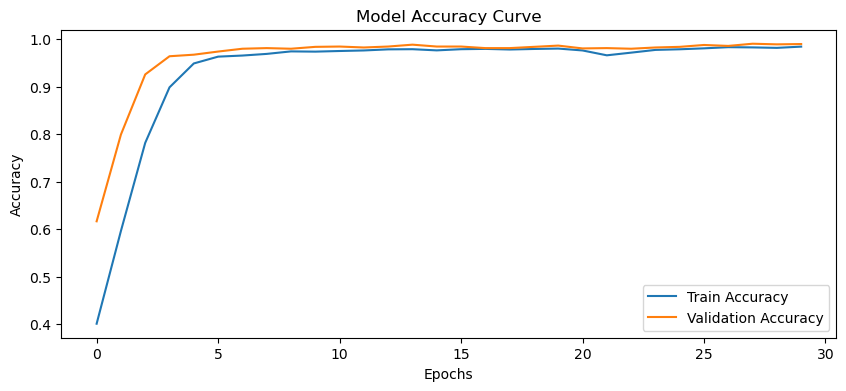

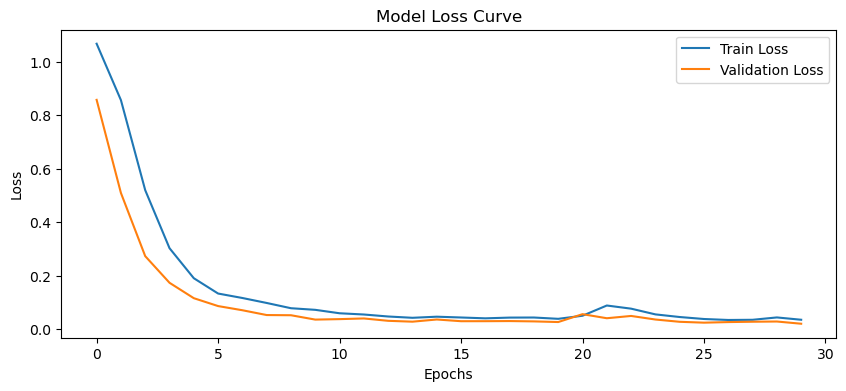

In [112]:
# Extract training history
'''
Diagonal values should be high (correct predictions).
Off-diagonal values indicate misclassifications.
If certain classes are misclassified more, your model might need class balancing or better features.
'''
history_dict = classification_history.history

# Plot Accuracy
plt.figure(figsize=(10, 4))
plt.plot(history_dict['accuracy'], label='Train Accuracy')
plt.plot(history_dict['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy Curve')
plt.show()

# Plot Loss
plt.figure(figsize=(10, 4))
plt.plot(history_dict['loss'], label='Train Loss')
plt.plot(history_dict['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss Curve')
plt.show()

### Test the Model

In [131]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare test data following the same steps as training
def prepare_test_data(test_df, structured_columns, scaler, caption_tokenizer, 
                     hashtag_tokenizer, maxlen_caption=50, maxlen_hashtag=3):
    # Create popularity category
    test_df['popularity_category'] = pd.cut(
        test_df['popularity_index'],
        bins=[-1, 100, 600, float('inf')],
        labels=[0, 1, 2]
    ).astype('int32')
    
    # Prepare structured features
    structured_cols_to_drop = ['popularity_index', 'popularity_category', 'caption',
                             'hashtags/0', 'hashtags/1', 'hashtags/2']
    X_structured_test = pd.get_dummies(
        test_df.drop(structured_cols_to_drop, axis=1),
        columns=['productType', 'type', 'day_of_week', 'season', 'month_of_year']
    )
    
    # Ensure all columns from training exist in test data
    for col in structured_columns:
        if col not in X_structured_test.columns:
            X_structured_test[col] = 0
    
    # Reorder columns to match training data
    X_structured_test = X_structured_test[structured_columns]
    
    # Scale numeric features using the same scaler
    numeric_cols = ['dimensionsHeight', 'dimensionsWidth']
    X_structured_test[numeric_cols] = scaler.transform(X_structured_test[numeric_cols])
    
    # Convert to numpy array
    X_structured_test = X_structured_test.values.astype('float32')
    
    # Prepare caption text features
    captions_test = test_df['caption'].astype(str).tolist()
    caption_sequences_test = caption_tokenizer.texts_to_sequences(captions_test)
    X_text_test = pad_sequences(caption_sequences_test, maxlen=maxlen_caption).astype('int32')
    
    # Prepare hashtag features
    hashtags_combined_test = test_df[['hashtags/0', 'hashtags/1', 'hashtags/2']] \
                            .astype(str) \
                            .agg(" ".join, axis=1)
    hashtag_sequences_test = hashtag_tokenizer.texts_to_sequences(hashtags_combined_test)
    X_hashtag_test = pad_sequences(hashtag_sequences_test, maxlen=maxlen_hashtag).astype('int32')
    
    # Prepare target variable
    y_test = test_df['popularity_category'].values.astype('int32')
    
    return X_structured_test, X_text_test, X_hashtag_test, y_test



50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


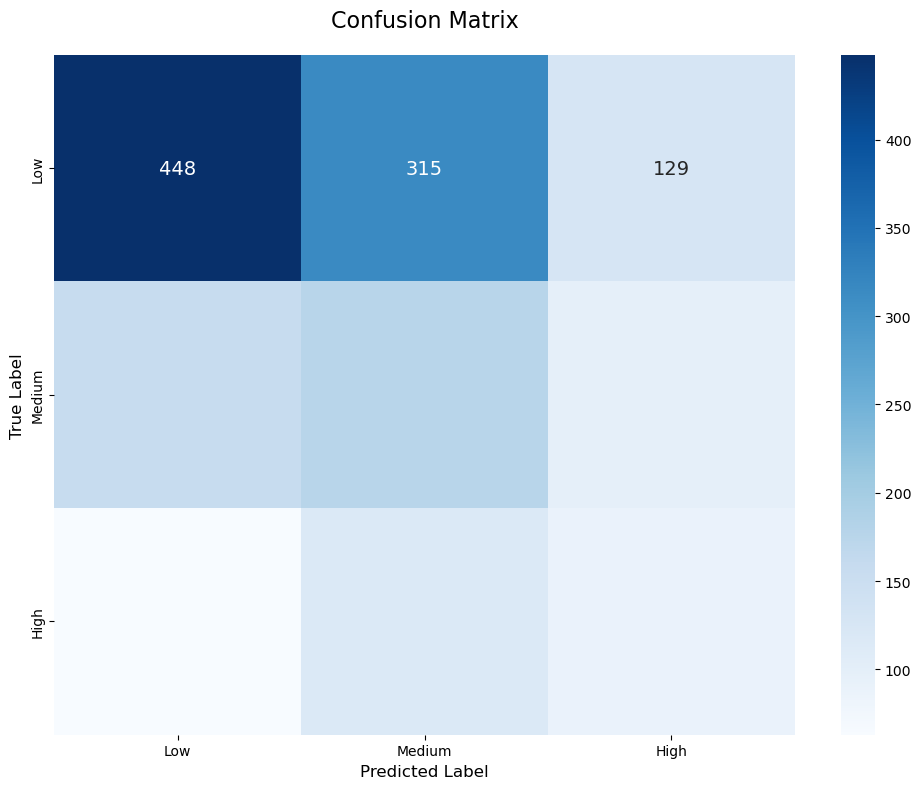


Test Accuracy: 0.4476

Confusion Matrix:
[[448 315 129]
 [157 176  99]
 [ 63 118  90]]


In [136]:
def evaluate_model(model, X_structured_test, X_text_test, X_hashtag_test, y_test):
    # Get model predictions
    y_pred_proba = model.predict([X_structured_test, X_text_test, X_hashtag_test])
    y_pred = np.argmax(y_pred_proba, axis=1)
    
    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Calculate accuracy
    accuracy = np.sum(y_pred == y_test) / len(y_test)
    
    # Create labels for the classes
    class_labels = ['Low', 'Medium', 'High']
    
    # Plot confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=class_labels, 
                yticklabels=class_labels,
                annot_kws={'size': 14})
    plt.title('Confusion Matrix', fontsize=16, pad=20)
    plt.ylabel('True Label', fontsize=12)
    plt.xlabel('Predicted Label', fontsize=12)
    
    # Adjust layout to prevent label cutoff
    plt.tight_layout()
    plt.show()
    
    return accuracy, cm

# Prepare test data
X_structured_test, X_text_test, X_hashtag_test, y_test = prepare_test_data(
    test_df, 
    structured_columns,
    scaler, 
    caption_tokenizer, 
    hashtag_tokenizer
)

# Evaluate model
accuracy, confusion_mat = evaluate_model(
    hashtag_classification_model,
    X_structured_test,
    X_text_test,
    X_hashtag_test,
    y_test
)

print(f"\nTest Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(confusion_mat)

In [129]:
# ---- Classification Report ----
report = classification_report(y_test, y_pred, target_names=['Low', 'Medium', 'High'])
print(report)

              precision    recall  f1-score   support

         Low       0.67      0.50      0.57       892
      Medium       0.29      0.41      0.34       432
        High       0.28      0.33      0.31       271

    accuracy                           0.45      1595
   macro avg       0.41      0.41      0.41      1595
weighted avg       0.50      0.45      0.46      1595



In [126]:
test_filtered_df['popularity_category'].count()

1595

In [40]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.sequence import pad_sequences

def predict_popularity_category2(new_df, model, caption_tokenizer, hashtag_tokenizer, scaler, structured_columns,
                                caption_maxlen=50, hashtag_maxlen=3):
    """
    Predicts the popularity_category for new data using the trained classification model that includes hashtag features.
    
    Parameters:
    - new_df (pd.DataFrame): New data with the following columns:
         'caption', 'dimensionsHeight', 'dimensionsWidth',
         'hashtags/0', 'hashtags/1', 'hashtags/2',
         'productType', 'type', 'day_of_week', 'season', 'month_of_year'
         (Do not include the target column 'popularity_category'.)
    - model (tf.keras.Model): The trained Keras classification model.
    - caption_tokenizer (Tokenizer): The fitted Keras Tokenizer used for caption text processing.
    - hashtag_tokenizer (Tokenizer): The fitted Keras Tokenizer used for hashtag text processing.
    - scaler (StandardScaler): The fitted StandardScaler for numeric features.
    - structured_columns (list or pd.Index): Column names of the structured features as produced by pd.get_dummies during training.
    - caption_maxlen (int): Maximum length for padded caption sequences (default is 50).
    - hashtag_maxlen (int): Maximum length for padded hashtag sequences (default is 3).
    
    Returns:
    - predictions (list): A list of predicted popularity categories as strings ('Low', 'Medium', or 'High') for each row.
    """
    # --- Process Structured Features ---
    # Drop text-related columns (caption and hashtag columns) to create the structured branch.
    structured_data = new_df.drop(['caption', 'hashtags/0', 'hashtags/1', 'hashtags/2'], axis=1)
    
    # One-hot encode the categorical columns.
    structured_data = pd.get_dummies(
        structured_data,
        columns=['productType', 'type', 'day_of_week', 'season', 'month_of_year']
    )
    
    # Reindex the DataFrame to ensure it has the same columns as used in training.
    structured_data = structured_data.reindex(columns=structured_columns, fill_value=0)
    
    # Scale the numeric columns (assuming they are 'dimensionsHeight' and 'dimensionsWidth').
    structured_data[['dimensionsHeight', 'dimensionsWidth']] = scaler.transform(
        structured_data[['dimensionsHeight', 'dimensionsWidth']]
    )
    
    # Convert to a float32 NumPy array.
    X_structured = structured_data.values.astype('float32')
    
    # --- Process Caption Text Features ---
    # Convert the 'caption' column to a list of strings.
    captions = new_df['caption'].astype(str).tolist()
    # Tokenize and pad the caption sequences.
    caption_sequences = caption_tokenizer.texts_to_sequences(captions)
    X_text = pad_sequences(caption_sequences, maxlen=caption_maxlen).astype('int32')
    
    # --- Process Hashtag Features ---
    # Combine the hashtag columns into one string per sample.
    hashtags_combined = new_df[['hashtags/0', 'hashtags/1', 'hashtags/2']].astype(str).agg(" ".join, axis=1)
    # Tokenize and pad the combined hashtag text.
    hashtag_sequences = hashtag_tokenizer.texts_to_sequences(hashtags_combined)
    X_hashtag = pad_sequences(hashtag_sequences, maxlen=hashtag_maxlen).astype('int32')
    
    # --- Make Predictions ---
    # The model expects three inputs: structured features, caption text, and hashtag text.
    probs = model.predict([X_structured, X_text, X_hashtag])
    predicted_indices = np.argmax(probs, axis=1)
    
    # Map numeric predictions to human-readable categories.
    answer = []
    for score in predicted_indices:
        if score == 0:
            answer.append('Low')
        elif score == 1:
            answer.append('Medium')
        elif score == 2:
            answer.append('High')
    
    print(f'Scale: Low(0-100), Medium(101-600), High(601 or More)')
    return answer

# -----------------------------
# Example usage:
# -----------------------------
# new_data should be a DataFrame with the columns:
# 'caption', 'dimensionsHeight', 'dimensionsWidth',
# 'hashtags/0', 'hashtags/1', 'hashtags/2',
# 'productType', 'type', 'day_of_week', 'season', 'month_of_year'
new_data = pd.DataFrame({
    'caption': ["Amazing product, works great!", "Terrible product, not recommended."],
    'dimensionsHeight': [1500, 200],
    'dimensionsWidth': [1000, 120],
    'hashtags/0': ["Wedding", "bad"],
    'hashtags/1': ["trendy", "worse"],
    'hashtags/2': ["sale", "cheap"],
    'productType': ["clips", "TypeB"],
    'type': ["Video", "SubType2"],
    'day_of_week': ["Monday", "Tuesday"],
    'season': ["Summer", "Winter"],
    'month_of_year': [6, 12]
})

# Assuming that the variables 'hashtag_classification_model', 'caption_tokenizer', 'hashtag_tokenizer', 
# 'scaler', and 'structured_columns' are defined (from training), call the prediction function:
predicted_categories = predict_popularity_category2(new_data, hashtag_classification_model,
                                                   caption_tokenizer, hashtag_tokenizer,
                                                   scaler, structured_columns)
print("Predicted popularity categories:", predicted_categories)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step
Scale: Low (0-250), Medium (251-1000), High (1001 or More)
Predicted popularity categories: ['High', 'Low']


### Without dimensions width/height

In [143]:
# ===========================================
# Data Preparation (Classification with Hashtags)
# ===========================================

# Assume df is your original DataFrame that includes the hashtag columns.
hashtag_columns = ['caption', 'hashtags/0', 'hashtags/1', 'hashtags/2',
                   'productType', 'type', 'day_of_week', 'season', 
                   'month_of_year', 'popularity_index']
hashtag_filtered_df = df[hashtag_columns].copy()

# Create popularity_category from popularity_index.
# (Categories: 0 for low, 1 for medium, 2 for high popularity)
hashtag_filtered_df['popularity_category'] = pd.cut(
    hashtag_filtered_df['popularity_index'],
    bins=[-1, 100, 600, float('inf')],
    labels=[0, 1, 2]
).astype('int32')  # Ensure integer type

# ---- Structured Features ----
# For the structured branch, we remove the text features:
# 'caption' and the hashtag columns.
structured_cols_to_drop = ['popularity_index', 'popularity_category', 'caption',
                           'hashtags/0', 'hashtags/1', 'hashtags/2']
X_structured_df = pd.get_dummies(
    hashtag_filtered_df.drop(structured_cols_to_drop, axis=1),
    columns=['productType', 'type', 'day_of_week', 'season', 'month_of_year']
)

# Save the structured column names for future use (e.g. for new data)
structured_columns = X_structured_df.columns

# Convert structured features to a NumPy array.
X_structured = X_structured_df.values.astype('float32')

# ---- Caption Text Features ----
captions = hashtag_filtered_df['caption'].astype(str).tolist()
max_words_caption = 5000  # Vocabulary size for captions
caption_tokenizer = Tokenizer(num_words=max_words_caption)
caption_tokenizer.fit_on_texts(captions)
caption_sequences = caption_tokenizer.texts_to_sequences(captions)
maxlen_caption = 50
X_text = pad_sequences(caption_sequences, maxlen=maxlen_caption).astype('int32')

# ---- Hashtag Features ----
# Combine the three hashtag columns into one string per sample.
hashtags_combined = hashtag_filtered_df[['hashtags/0', 'hashtags/1', 'hashtags/2']].astype(str).agg(" ".join, axis=1)

max_words_hashtag = 2000  # Vocabulary size for hashtags
hashtag_tokenizer = Tokenizer(num_words=max_words_hashtag)
hashtag_tokenizer.fit_on_texts(hashtags_combined)
hashtag_sequences = hashtag_tokenizer.texts_to_sequences(hashtags_combined)
maxlen_hashtag = 3
X_hashtag = pad_sequences(hashtag_sequences, maxlen=maxlen_hashtag).astype('int32')

# ---- Target Variable ----
y = hashtag_filtered_df['popularity_category'].values.astype('int32')


In [150]:
structured_columns

Index(['productType_carousel_container', 'productType_clips',
       'productType_feed', 'productType_igtv', 'type_Image', 'type_Sidecar',
       'type_Video', 'day_of_week_Friday', 'day_of_week_Monday',
       'day_of_week_Saturday', 'day_of_week_Sunday', 'day_of_week_Thursday',
       'day_of_week_Tuesday', 'day_of_week_Wednesday', 'season_Fall',
       'season_Spring', 'season_Summer', 'season_Winter', 'month_of_year_1',
       'month_of_year_2', 'month_of_year_3', 'month_of_year_4',
       'month_of_year_5', 'month_of_year_6', 'month_of_year_7',
       'month_of_year_8', 'month_of_year_9', 'month_of_year_10',
       'month_of_year_11', 'month_of_year_12'],
      dtype='object')

In [144]:
# ===========================================
# Constructing the Multi-Input Classification Neural Network
# ===========================================

# --- Structured Input Branch ---
structured_input = Input(shape=(X_structured.shape[1],), name='structured_input')
x_struct = Dense(64, activation='relu', 
                 kernel_regularizer=regularizers.l2(0.001), 
                 name='dense_struct_1')(structured_input)
x_struct = BatchNormalization(name='bn_struct_1')(x_struct)
x_struct = Dropout(0.5, name='dropout_struct_1')(x_struct)
x_struct = Dense(32, activation='relu', 
                 kernel_regularizer=regularizers.l2(0.001), 
                 name='dense_struct_2')(x_struct)
x_struct = BatchNormalization(name='bn_struct_2')(x_struct)
x_struct = Dropout(0.5, name='dropout_struct_2')(x_struct)

# --- Caption Text Input Branch ---
text_input = Input(shape=(maxlen_caption,), name='text_input')
x_text = Embedding(input_dim=max_words_caption, output_dim=50, input_length=maxlen_caption, 
                   name='caption_embedding')(text_input)
x_text = Conv1D(filters=64, kernel_size=3, activation='relu', 
                kernel_regularizer=regularizers.l2(0.001), 
                name='conv1d_caption')(x_text)
x_text = BatchNormalization(name='bn_caption')(x_text)
x_text = GlobalMaxPooling1D(name='global_max_pool_caption')(x_text)
x_text = Dense(32, activation='relu', 
               kernel_regularizer=regularizers.l2(0.001), 
               name='dense_text')(x_text)
x_text = BatchNormalization(name='bn_text')(x_text)
x_text = Dropout(0.5, name='dropout_text')(x_text)

# --- Hashtag Input Branch ---
hashtag_input = Input(shape=(maxlen_hashtag,), name='hashtag_input')
x_hashtag = Embedding(input_dim=max_words_hashtag, output_dim=30, input_length=maxlen_hashtag, 
                      name='hashtag_embedding')(hashtag_input)
x_hashtag = Conv1D(filters=32, kernel_size=2, activation='relu', 
                   kernel_regularizer=regularizers.l2(0.001),
                   name='conv1d_hashtag')(x_hashtag)
x_hashtag = BatchNormalization(name='bn_hashtag')(x_hashtag)
x_hashtag = GlobalMaxPooling1D(name='global_max_pool_hashtag')(x_hashtag)
x_hashtag = Dense(16, activation='relu', 
                  kernel_regularizer=regularizers.l2(0.001),
                  name='dense_hashtag')(x_hashtag)
x_hashtag = BatchNormalization(name='bn_hashtag_dense')(x_hashtag)
x_hashtag = Dropout(0.5, name='dropout_hashtag')(x_hashtag)

# --- Combine All Branches ---
combined = Concatenate(name='concatenate')([x_struct, x_text, x_hashtag])
x = Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001), name='dense_combined_1')(combined)
x = BatchNormalization(name='bn_combined_1')(x)
x = Dropout(0.5, name='dropout_combined')(x)
x = Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001), name='dense_combined_2')(x)
x = BatchNormalization(name='bn_combined_2')(x)
x = Dropout(0.5, name='dropout_combined_2')(x)

# --- Output Layer for Classification ---
output = Dense(3, activation='softmax', name='output')(x)

# Create the model with three inputs.
hashtag_classification_model = Model(inputs=[structured_input, text_input, hashtag_input], outputs=output)

# Compile the model.
hashtag_classification_model.compile(optimizer=Adam(learning_rate=0.001),
                                     loss='sparse_categorical_crossentropy',
                                     metrics=['accuracy'])

hashtag_classification_model.summary()

# -----------------------------
# Callbacks for Early Stopping and Learning Rate Reduction
# -----------------------------
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# ===========================================
# Train the Model (Classification with Hashtags)
# ===========================================
hashtag_history = hashtag_classification_model.fit(
    [X_structured, X_text, X_hashtag],
    y,
    epochs=30,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop, reduce_lr]
)


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ text_input          │ (None, 50)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ hashtag_input       │ (None, 3)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ structured_input    │ (None, 30)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ caption_embedding   │ (None, 50, 50)    │    250,000 │ text_input[0][0]  │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ hashtag_embedding   │ (None, 3, 30)     │     60,000 │ hashtag_input[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_struct_1      │ (None, 64)        │      1,984 │ structured_input… │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_caption      │ (None, 48, 64)    │      9,664 │ caption_embeddin… │
│ (Conv1D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_hashtag      │ (None, 2, 32)     │      1,952 │ hashtag_embeddin… │
│ (Conv1D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_struct_1         │ (None, 64)        │        256 │ dense_struct_1[0… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_caption          │ (None, 48, 64)    │        256 │ conv1d_caption[0… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_hashtag          │ (None, 2, 32)     │        128 │ conv1d_hashtag[0… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_struct_1    │ (None, 64)        │          0 │ bn_struct_1[0][0] │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pool_ca… │ (None, 64)        │          0 │ bn_caption[0][0]  │
│ (GlobalMaxPooling1… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pool_ha… │ (None, 32)        │          0 │ bn_hashtag[0][0]  │
│ (GlobalMaxPooling1… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_struct_2      │ (None, 32)        │      2,080 │ dropout_struct_1… │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_text (Dense)  │ (None, 32)        │      2,080 │ global_max_pool_… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_hashtag       │ (None, 16)        │        528 │ global_max_pool_… │
│ (Dense)             │                   │            │                 

 Total params: 336,995 (1.29 MB)

 Trainable params: 336,323 (1.28 MB)

 Non-trainable params: 672 (2.62 KB)

Epoch 1/30
190/190 ━━━━━━━━━━━━━━━━━━━━ 18s 21ms/step - accuracy: 0.3397 - loss: 2.1183 - val_accuracy: 0.3892 - val_loss: 1.4274 - learning_rate: 0.0010
Epoch 2/30
190/190 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.3662 - loss: 1.6210 - val_accuracy: 0.4875 - val_loss: 1.3711 - learning_rate: 0.0010
Epoch 3/30
190/190 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.4132 - loss: 1.4404 - val_accuracy: 0.5541 - val_loss: 1.3038 - learning_rate: 0.0010
Epoch 4/30
190/190 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.4609 - loss: 1.3596 - val_accuracy: 0.6253 - val_loss: 1.1975 - learning_rate: 0.0010
Epoch 5/30
190/190 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.5447 - loss: 1.2530 - val_accuracy: 0.7368 - val_loss: 1.0236 - learning_rate: 0.0010
Epoch 6/30
190/190 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.6224 - loss: 1.1340 - val_accuracy: 0.8140 - val_loss: 0.8611 - learning_rate: 0.0010
Epoch 7/30
190/190 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.7003 - loss: 0

In [148]:
def preprocess_and_predict(new_data, model, structured_columns, caption_tokenizer, hashtag_tokenizer, maxlen_caption=50, maxlen_hashtag=3):
    """
    Preprocesses new input data and predicts using the trained model.

    Parameters:
    - new_data (DataFrame): The new data to predict on.
    - model (keras.Model): The trained multi-input classification model.
    - structured_columns (list): List of columns for the structured input.
    - caption_tokenizer (Tokenizer): Tokenizer for caption text.
    - hashtag_tokenizer (Tokenizer): Tokenizer for hashtags.
    - maxlen_caption (int): Maximum sequence length for captions.
    - maxlen_hashtag (int): Maximum sequence length for hashtags.

    Returns:
    - predictions (numpy array): The predicted class probabilities for the new data.
    """
    import pandas as pd
    import numpy as np
    from keras.preprocessing.sequence import pad_sequences

    # ---- Step 1: Structured Data Preprocessing ----
    # Ensure all necessary columns are present
    structured_data = new_data.drop(['caption', 'hashtags/0', 'hashtags/1', 'hashtags/2'], axis=1)
    structured_data = pd.get_dummies(structured_data, columns=['productType', 'type', 'day_of_week', 'season', 'month_of_year'])
    
    # Reorder the columns to match the training data
    for col in structured_columns:
        if col not in structured_data:
            structured_data[col] = 0  # Add missing columns as zeros (for one-hot encoding consistency)
    structured_data = structured_data[structured_columns]

    # Convert to NumPy array
    X_structured_new = structured_data.values.astype('float32')

    # ---- Step 2: Caption Text Preprocessing ----
    new_captions = new_data['caption'].astype(str).tolist()
    caption_sequences = caption_tokenizer.texts_to_sequences(new_captions)
    X_text_new = pad_sequences(caption_sequences, maxlen=maxlen_caption).astype('int32')

    # ---- Step 3: Hashtag Preprocessing ----
    # Combine hashtag columns into one string per sample
    hashtags_combined_new = new_data[['hashtags/0', 'hashtags/1', 'hashtags/2']].astype(str).agg(" ".join, axis=1)
    hashtag_sequences_new = hashtag_tokenizer.texts_to_sequences(hashtags_combined_new)
    X_hashtag_new = pad_sequences(hashtag_sequences_new, maxlen=maxlen_hashtag).astype('int32')

    # ---- Step 4: Model Prediction ----
    predictions = model.predict([X_structured_new, X_text_new, X_hashtag_new])

    return predictions


new_data = pd.DataFrame({
    'caption': ['New caption example'],
    'hashtags/0': ['example_tag'],
    'hashtags/1': ['another_tag'],
    'hashtags/2': ['final_tag'],
    'productType': ['type1'],
    'type': ['typeA'],
    'day_of_week': ['Monday'],
    'season': ['Winter'],
    'month_of_year': ['January'],
    'popularity_index': [500]  # Dummy value to drop later
})

predictions = preprocess_and_predict(new_data, hashtag_classification_model,
              structured_columns, caption_tokenizer, hashtag_tokenizer)
print("Predictions:", predictions)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step
Predictions: [[0.01209539 0.97889817 0.0090064 ]]


### Save Model

In [146]:
hashtag_classification_model.save('hashtag_classification_Model_97ACC.keras')

In [149]:
import pickle

# Save caption_tokenizer
with open("caption_tokenizer2.pkl", "wb") as caption_file:
    pickle.dump(caption_tokenizer, caption_file)

# Save hashtag_tokenizer
with open("hashtag_tokenizer2.pkl", "wb") as hashtag_file:
    pickle.dump(hashtag_tokenizer, hashtag_file)